In [1]:
#downlaoding the dataset
!rm transfusion.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data

rm: cannot remove 'transfusion.data': No such file or directory
--2021-08-07 15:35:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12843 (13K) [application/x-httpd-php]
Saving to: ‘transfusion.data’

transfusion.data    100%[===================>]  12.54K  --.-KB/s    in 0s      

2021-08-07 15:35:11 (60.8 MB/s) - ‘transfusion.data’ saved [12843/12843]



In [2]:
import pandas as pd

In [3]:
!ls

sample_data  transfusion.data


In [4]:
import os
os.chdir("/content/")

In [5]:
!ls

sample_data  transfusion.data


In [6]:
#data is read as dataframes
df = pd.read_csv("transfusion.data",delimiter=",")

In [7]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [8]:
df.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [9]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [10]:
#feature separation
feature_columns = ['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']
X = df[feature_columns].values
#to be predicted
y = df['whether he/she donated blood in March 2007'].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
#y

In [12]:
#splitting the dataset
from sklearn.model_selection import train_test_split
feature_train,feature_test,label_train,label_test = train_test_split(X,y,test_size=0.2,random_state=15)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


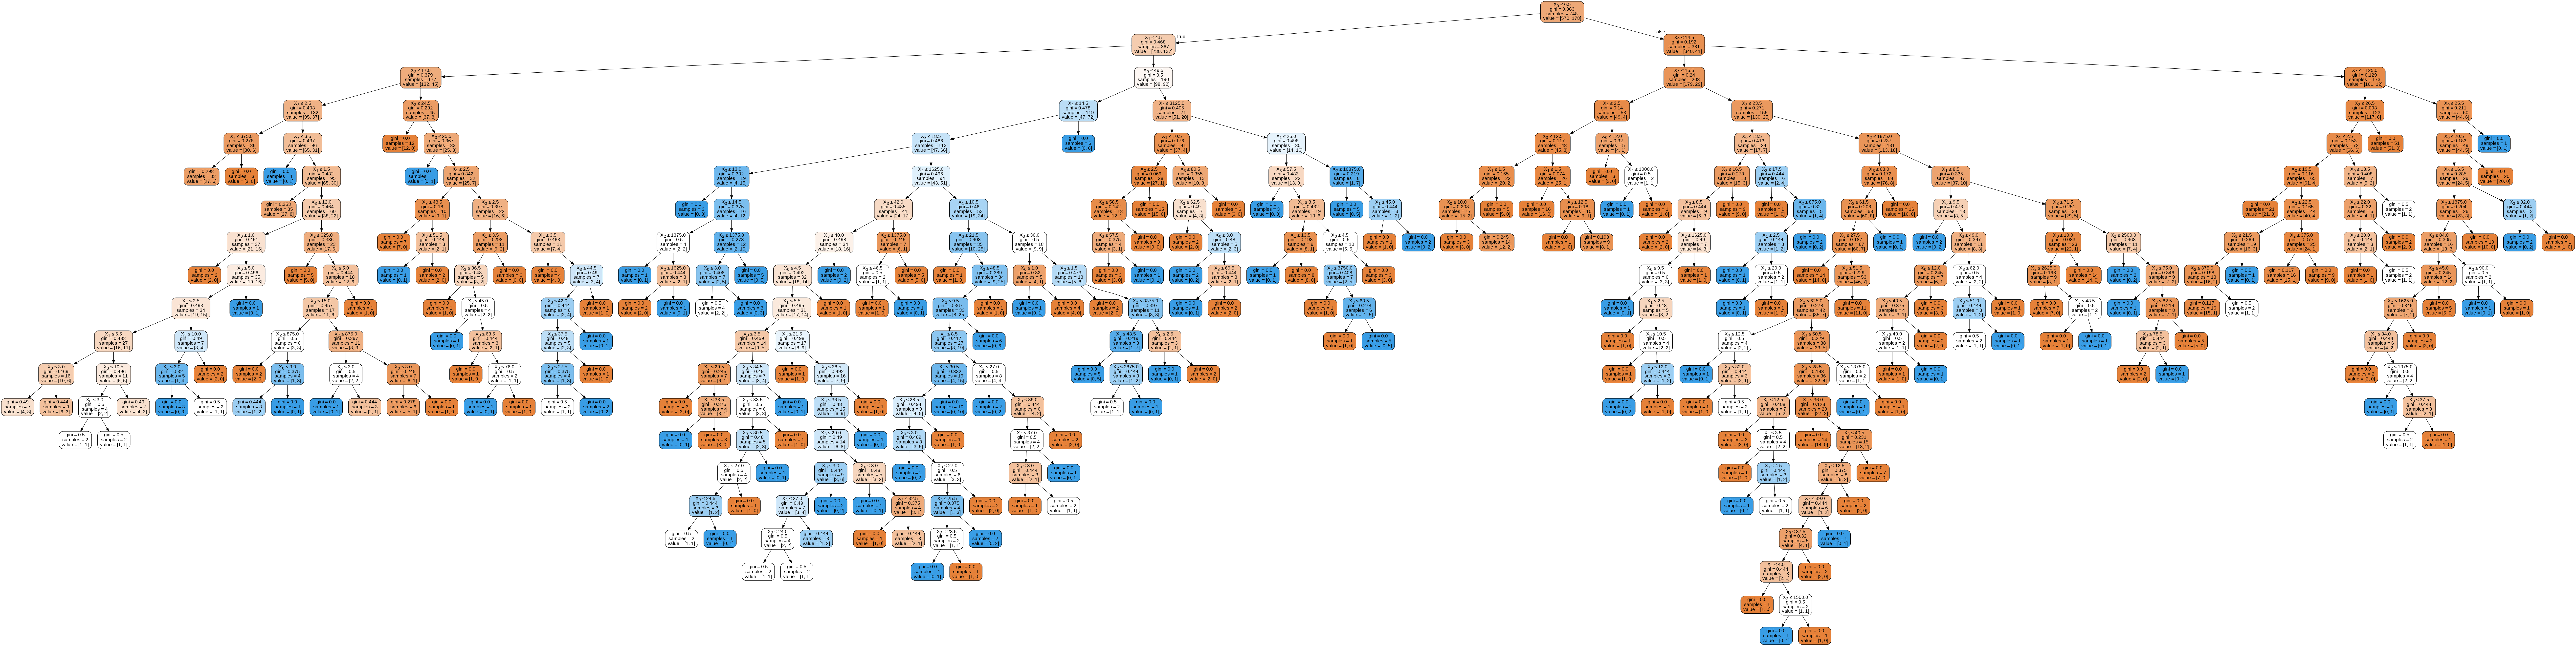

In [13]:
#generating a tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,y)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
train_pred = dtree.predict_proba(feature_train)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(14,15))
print(scaler.fit(train_pred))
print(scaler.data_max_)
print(scaler.transform(train_pred))
train_pred_norm = scaler.transform(train_pred)


len(train_pred_norm)

opti_k = []
for i,j in train_pred_norm:
  opti_k.append(max(i,j))

print(opti_k)
#obtained the optimal k value for all the samples in train set by choosing max value

MinMaxScaler(copy=True, feature_range=(14, 15))
[1. 1.]
[[14.81818182 14.18181818]
 [14.         15.        ]
 [14.         15.        ]
 ...
 [15.         14.        ]
 [14.88888889 14.11111111]
 [14.9375     14.0625    ]]
[14.818181818181818, 15.0, 15.0, 15.0, 15.0, 15.0, 14.9375, 15.0, 14.88888888888889, 15.0, 15.0, 15.0, 15.0, 14.9375, 15.0, 14.88888888888889, 15.0, 15.0, 15.0, 14.771428571428572, 14.9375, 14.857142857142858, 15.0, 15.0, 14.5, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.666666666666666, 15.0, 15.0, 15.0, 15.0, 14.818181818181818, 15.0, 15.0, 15.0, 15.0, 14.5, 14.666666666666666, 15.0, 15.0, 14.818181818181818, 15.0, 14.5, 14.771428571428572, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.666666666666666, 15.0, 15.0, 15.0, 14.666666666666666, 15.0, 14.9375, 14.5, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.9375, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.9375, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.771428571428572, 15.0, 15.0, 15.0, 1

In [15]:
df2 = pd.DataFrame(feature_train,columns =['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)'])
df2.head(3)
#inserting optimal k as new feature
df2.insert(4,"Optimal K",opti_k)

In [16]:
df2.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Optimal K
0,2,1,250,2,14.818182
1,4,33,8250,98,15.000000
2,4,4,1000,43,15.000000
3,14,7,1750,73,15.000000
4,23,3,750,33,15.000000


In [17]:
feature_train = df2.values

In [18]:
feature_train[0]

array([  2.        ,   1.        , 250.        ,   2.        ,
        14.81818182])

In [19]:
train_pred = dtree.predict_proba(feature_test)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(14,15))
print(scaler.fit(train_pred))
print(scaler.data_max_)
print(scaler.transform(train_pred))
train_pred_norm = scaler.transform(train_pred)


len(train_pred_norm)

opti_k = []
for i,j in train_pred_norm:
  opti_k.append(max(i,j))

print(opti_k)
#same optimal k is calculated for all samples in test set

df3 = pd.DataFrame(feature_test,columns =['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)'])
df3.head(3)
df3.insert(4,"Optimal K",opti_k)
#inserted into test features
feature_test = df3.values

print(feature_test)

MinMaxScaler(copy=True, feature_range=(14, 15))
[1. 1.]
[[15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [14.         15.        ]
 [15.         14.        ]
 [14.         15.        ]
 [15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [14.5        14.5       ]
 [14.         15.        ]
 [15.         14.        ]
 [14.         15.        ]
 [15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [14.85714286 14.14285714]
 [14.5        14.5       ]
 [14.85714286 14.14285714]
 [14.77142857 14.22857143]
 [15.         14.        ]
 [15.         14.        ]
 [14.77142857 14.22857143]
 [14.         15.        ]
 [15.         14.        ]
 [14.81818182 14.18181818]
 [15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [14.         15.        ]
 [15.         14.        ]
 [14.         15.        ]

In [20]:
#knn classifier for predicting whether blood donated in march 2007
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(algorithm="kd_tree",n_jobs=-1,n_neighbors=15,leaf_size=20)
neigh.fit(feature_train,label_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                     weights='uniform')

In [21]:
import numpy as np
neigh.predict(feature_test)

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [22]:
print("Accuracy is ",neigh.score(feature_test,label_test))

Accuracy is  0.7733333333333333


In [23]:
feature_test[1]

array([  16.,    4., 1000.,   33.,   15.])

In [24]:
label_test[1]

0

In [25]:
!pip install decision-tree-id3

     |████████████████████████████████| 154 kB 6.3 MB/s 
  Created wheel for decision-tree-id3: filename=decision_tree_id3-0.1.2-py3-none-any.whl size=15960 sha256=cb5084013194d052c1c75ece06b2cf4b8257d0f5550905f6aff6ad1f366cf72b
  Stored in directory: /root/.cache/pip/wheels/19/24/be/ceeb7146de9186dada6000e36b040c6724548cd7ecbf7c557e
Successfully built decision-tree-id3


In [26]:
neigh.get_params()

{'algorithm': 'kd_tree',
 'leaf_size': 20,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 15,
 'p': 2,
 'weights': 'uniform'}

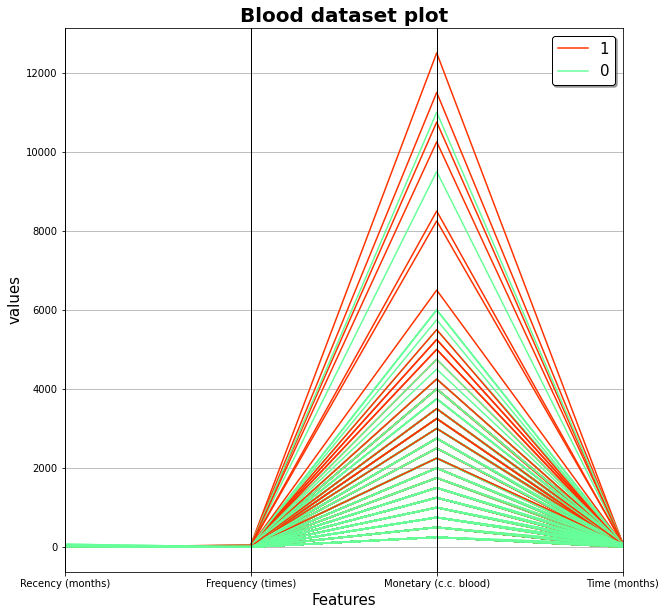

In [27]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10,10))
parallel_coordinates(df, "whether he/she donated blood in March 2007",color=('#ff3300', '#66ff99'))
plt.title('Blood dataset plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.plot(color="red")
plt.show()

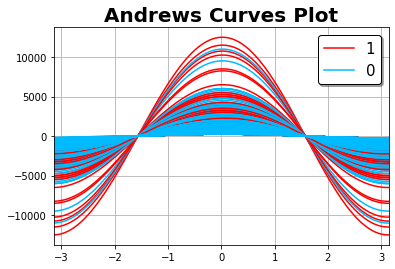

In [28]:
from pandas.plotting import andrews_curves
andrews_curves(df, "whether he/she donated blood in March 2007",color=('#ff0000', '#00bbff'))
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [29]:
#feature separation
feature_columns = ['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']
X = df[feature_columns].values
#to be predicted
y = df['whether he/she donated blood in March 2007'].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [30]:
#splitting the dataset
from sklearn.model_selection import train_test_split
feature_train,feature_test,label_train,label_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [31]:
feature_train

array([[   2,    1,  250,    2],
       [   4,   33, 8250,   98],
       [   4,    4, 1000,   43],
       ...,
       [  14,    1,  250,   14],
       [  14,    2,  500,   14],
       [  21,    1,  250,   21]])

In [32]:
train_pred = dtree.predict_proba(feature_train)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(14,15))
print(scaler.fit(train_pred))
print(scaler.data_max_)
print(scaler.transform(train_pred))
train_pred_norm = scaler.transform(train_pred)


len(train_pred_norm)

th_k = []
for i,j in train_pred_norm:
  th_k.append([i,j])

print(th_k)
#obtained the optimal k value for all the samples in train set by choosing max value

MinMaxScaler(copy=True, feature_range=(14, 15))
[1. 1.]
[[14.81818182 14.18181818]
 [14.         15.        ]
 [14.         15.        ]
 ...
 [15.         14.        ]
 [14.88888889 14.11111111]
 [14.9375     14.0625    ]]
[[14.818181818181818, 14.181818181818182], [14.0, 15.0], [14.0, 15.0], [15.0, 14.0], [15.0, 14.0], [15.0, 14.0], [14.9375, 14.0625], [15.0, 14.0], [14.88888888888889, 14.11111111111111], [14.0, 15.0], [15.0, 14.0], [14.0, 15.0], [15.0, 14.0], [14.9375, 14.0625], [15.0, 14.0], [14.88888888888889, 14.11111111111111], [15.0, 14.0], [14.0, 15.0], [15.0, 14.0], [14.771428571428572, 14.228571428571428], [14.9375, 14.0625], [14.857142857142858, 14.142857142857142], [15.0, 14.0], [15.0, 14.0], [14.5, 14.5], [15.0, 14.0], [15.0, 14.0], [14.0, 15.0], [15.0, 14.0], [14.0, 15.0], [15.0, 14.0], [14.333333333333334, 14.666666666666666], [15.0, 14.0], [15.0, 14.0], [15.0, 14.0], [14.0, 15.0], [14.818181818181818, 14.181818181818182], [15.0, 14.0], [14.0, 15.0], [15.0, 14.0], [15.0

In [33]:
df4 = pd.DataFrame(feature_train,columns =['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)'])
df4.head(3)
#inserting k1 as new feature
k1 = []
k2 = []
for x in th_k:
  a = x[0] ** (1./2.)
  k1.append(a)
  b = x[1] ** (1./3.)
  k2.append(b)
print("K1 is ",k1)
print("k2 is ",k2)

K1 is  [3.8494391563163872, 3.7416573867739413, 3.7416573867739413, 3.872983346207417, 3.872983346207417, 3.872983346207417, 3.8649062084350767, 3.872983346207417, 3.858612300930075, 3.7416573867739413, 3.872983346207417, 3.7416573867739413, 3.872983346207417, 3.8649062084350767, 3.872983346207417, 3.858612300930075, 3.872983346207417, 3.7416573867739413, 3.872983346207417, 3.843361623816912, 3.8649062084350767, 3.854496446637726, 3.872983346207417, 3.872983346207417, 3.8078865529319543, 3.872983346207417, 3.872983346207417, 3.7416573867739413, 3.872983346207417, 3.7416573867739413, 3.872983346207417, 3.7859388972001824, 3.872983346207417, 3.872983346207417, 3.872983346207417, 3.7416573867739413, 3.8494391563163872, 3.872983346207417, 3.7416573867739413, 3.872983346207417, 3.872983346207417, 3.8078865529319543, 3.8297084310253524, 3.872983346207417, 3.872983346207417, 3.8494391563163872, 3.872983346207417, 3.8078865529319543, 3.843361623816912, 3.872983346207417, 3.872983346207417, 3.7

In [34]:
df4.head(3)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,1,250,2
1,4,33,8250,98
2,4,4,1000,43


In [35]:
df4.insert(4,"K1",k1)
df4.insert(5,"k2",k2)

In [36]:
df4.head(3)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),K1,k2
0,2,1,250,2,3.849439,2.420531
1,4,33,8250,98,3.741657,2.466212
2,4,4,1000,43,3.741657,2.466212


In [37]:
feature_train = df4.values

In [38]:
test_pred = dtree.predict_proba(feature_test)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(14,15))
print(scaler.fit(test_pred))
print(scaler.data_max_)
print(scaler.transform(test_pred))
test_pred_norm = scaler.transform(test_pred)


len(test_pred_norm)

th_k = []
for i,j in test_pred_norm:
  th_k.append([i,j])

print(th_k)
#same optimal k is calculated for all samples in test set

#inserting k1 as new feature
k1 = []
k2 = []
for x in th_k:
  a = x[0] ** (1./2.)
  k1.append(a)
  b = x[1] ** (1./3.)
  k2.append(b)
#print("K1 is ",k1)


df5 = pd.DataFrame(feature_test,columns =['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)'])
df5.head(3)
df5.insert(4,"K1",k1)
df5.insert(5,"k2",k2)
#inserted into test features
feature_test = df5.values

print(feature_test)

MinMaxScaler(copy=True, feature_range=(14, 15))
[1. 1.]
[[15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [14.         15.        ]
 [15.         14.        ]
 [14.         15.        ]
 [15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [14.5        14.5       ]
 [14.         15.        ]
 [15.         14.        ]
 [14.         15.        ]
 [15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [14.85714286 14.14285714]
 [14.5        14.5       ]
 [14.85714286 14.14285714]
 [14.77142857 14.22857143]
 [15.         14.        ]
 [15.         14.        ]
 [14.77142857 14.22857143]
 [14.         15.        ]
 [15.         14.        ]
 [14.81818182 14.18181818]
 [15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [15.         14.        ]
 [14.         15.        ]
 [15.         14.        ]
 [14.         15.        ]

In [39]:
#knn classifier for predicting whether blood donated in march 2007
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(algorithm="brute",n_neighbors=1,metric="minkowski",weights="distance",p=2)
neigh.fit(feature_train,label_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [40]:
import numpy as np
neigh.predict(feature_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [41]:
print("Accuracy is ",neigh.score(feature_test,label_test))

Accuracy is  0.7466666666666667


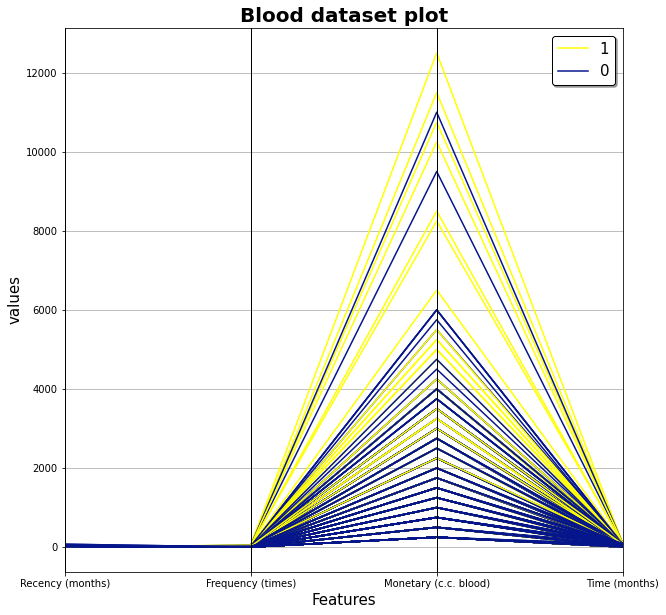

In [42]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10,10))
parallel_coordinates(df, "whether he/she donated blood in March 2007",color=('#ffff00', '#05158c'))
plt.title('Blood dataset plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.plot(color="red")
plt.show()

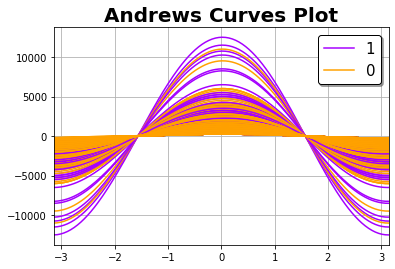

In [43]:
from pandas.plotting import andrews_curves
andrews_curves(df, "whether he/she donated blood in March 2007",color=('#a500ff', '#ffa100'))
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()